In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pyro
import numpy as np

In [3]:
from samplednn.mnistloader import setup_mnist_loader
mnist_train = setup_mnist_loader(train=True, use_cuda=True)

In [4]:
from kerneloose.kerneloose import KernelMap

In [5]:
from labeledclusters.labeledclusters import LabeledSampledOutputs

In [7]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(2, verbose=1)

# Bayesian NN

In [ ]:
from samplednn.bayesian import BayesianNetwork

In [ ]:
# bayes = BayesianNetwork(28*28, 1024, 10, use_cuda=True)

In [ ]:
# bayes.train(mnist_train, num_epochs=5, print_time=True, export_params=True, export_name='mnist_train')

In [ ]:
# bayes.load_predict_export('mnist_train', mnist_train, 100, 'mnist_train_train')

In [9]:
bayes_pred = np.load('models/bayesian/predictions/mnist_train_train/mnist_train_ep004.npy')

In [14]:
bayes_out = LabeledSampledOutputs(bayes_pred, mnist_train.dataset.targets.numpy())

In [16]:
bayes_subset = bayes_out.random_subset(500, per_class=True)

In [24]:
bayes_subset = bayes_subset[1][:,::10].reshape(-1,10)

In [29]:
%time bayes_tsne = tsne.fit_transform(bayes_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.052s...
[t-SNE] Computed neighbors for 50000 samples in 18.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [31]:
from matplotlib import pyplot as plt

In [35]:
x, y = bayes_tsne.transpose()

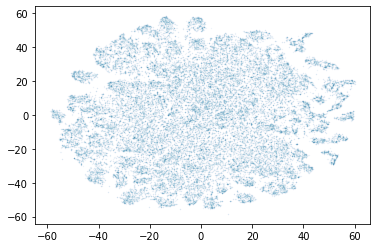

In [39]:
plt.scatter(x, y, alpha=0.1, s=0.1)

# Variational Autoencoder

In [ ]:
from samplednn.vae import VAE

In [ ]:
vae = VAE(28*28, 10, use_cuda=True)

In [ ]:
# pyro.clear_param_store()
# vae.train(mnist_train, num_epochs=5, print_time=True, export_params=True, export_name='mnist_train')

In [ ]:
vae.load_predict_export('mnist_train', mnist_train, 100, 'mnist_train_train')

# NN with Dropout

In [ ]:
from samplednn.dropout import NNWithDropout

In [ ]:
dropout = NNWithDropout(28*28, 1024, 10, p=0.5, use_cuda=True)

In [ ]:
# dropout.train(mnist_train, num_epochs=5, print_time=True, export_params=True, export_name='mnist_train')

In [ ]:
dropout.load_predict_export('mnist_train', mnist_train, 100, 'mnist_train_train')